In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('headbrain.csv')
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [4]:
df.shape

(237, 4)

In [5]:
df.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [6]:
df.isnull()

,Gender,AgeRange,HeadSize,BrainWeight
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
232,False,False,False,False
233,False,False,False,False
234,False,False,False,False
235,False,False,False,False


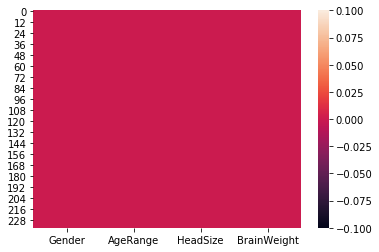

In [7]:
sns.heatmap(df.isnull())

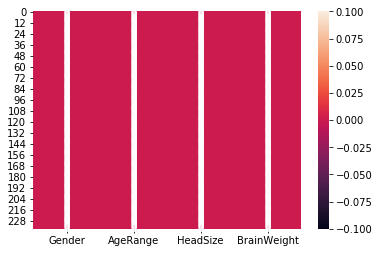

In [8]:
sns.heatmap(df.isnull(),annot=True)

In [22]:
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [10]:
df.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

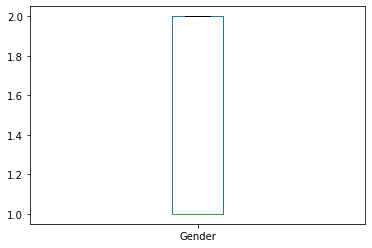

In [14]:
df['Gender'].plot.box()

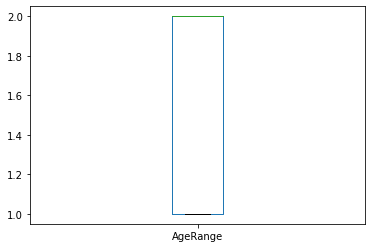

In [12]:
df['AgeRange'].plot.box()

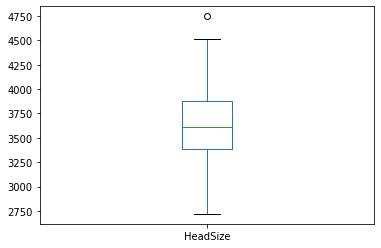

In [16]:
df['HeadSize'].plot.box()

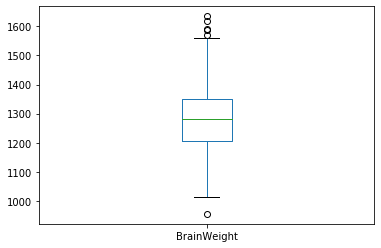

In [17]:
df['BrainWeight'].plot.box()

In [19]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


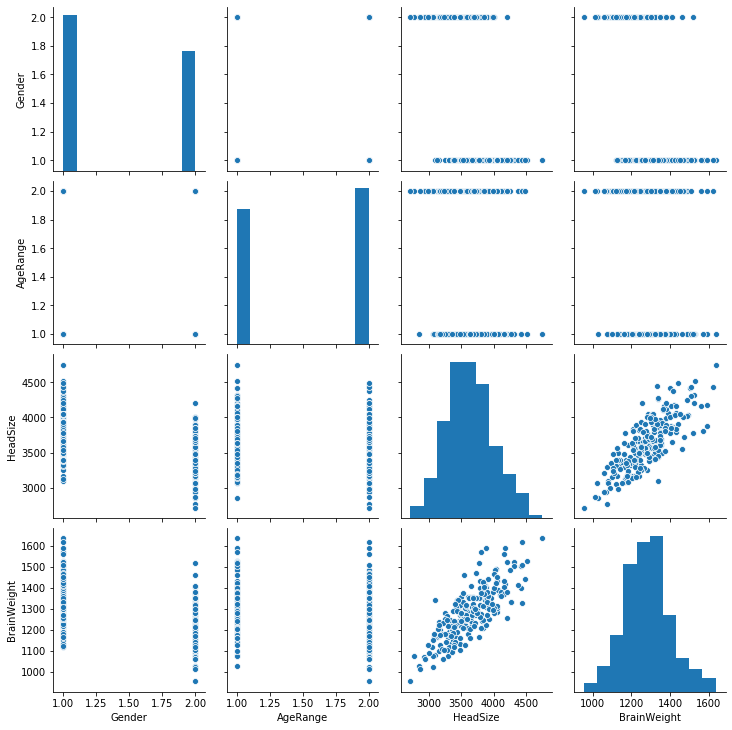

In [21]:
sns.pairplot(df)

In [23]:
# We need to remove the OUTLIERS

In [24]:
from scipy.stats import zscore

In [25]:
z=abs(zscore(df))
z
      

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [27]:
threshold=3
print(np.where(z>3))

(array([24], dtype=int64), array([2], dtype=int64))


In [28]:
z[24][2]

3.0536047510297246

In [30]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [31]:
df.shape

(237, 4)

In [32]:
df_new.shape

(236, 4)

[]

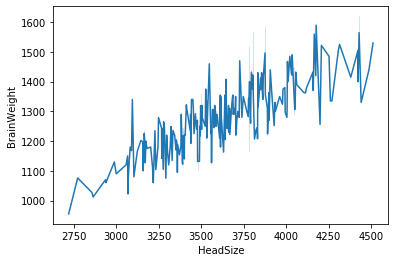

In [36]:
sns.lineplot(x=df_new['HeadSize'],y=df_new['BrainWeight'],data=df_new)
plt.plot()

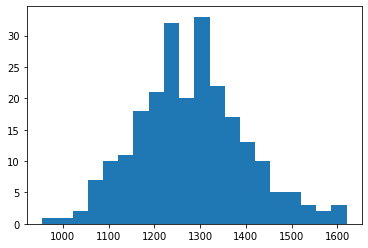

In [39]:
# To check if the data is normally distributed or not
plt.hist(x='BrainWeight',data=df_new, bins=20)
plt.show()

In [40]:
df_new.skew()

Gender         0.257959
AgeRange      -0.153968
HeadSize       0.164767
BrainWeight    0.205274
dtype: float64

In [41]:
# From here we can see that the following are the acceptable level of Skewness as it is less than (+/-) 0.5

In [42]:
#Let's put the model into machine learning

In [43]:
x=df_new.iloc[:,0:-1]
x

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177
...,...,...,...
232,2,2,3214
233,2,2,3394
234,2,2,3233
235,2,2,3352


In [45]:
y=df_new.iloc[:,-1]
print(y)

0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: BrainWeight, Length: 236, dtype: int64


In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import r2_score

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [48]:
x_train.shape

(188, 3)

In [49]:
x_test.shape

(48, 3)

In [50]:
lreg=LinearRegression()

In [51]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lreg.score(x_train,y_train)

0.656896057117791

In [53]:
lreg.coef_

array([-19.75332048, -18.12236322,   0.24968657])

In [54]:
lreg.intercept_

428.4287123379339

In [55]:
predlreg=lreg.predict(x_test)

In [57]:
print('r2-Score =',r2_score(y_test,predlreg))

r2-Score = 0.5517413115744891


In [59]:
print(mean_absolute_error(y_test,predlreg))
print(mean_squared_error(y_test,predlreg))
print(np.sqrt(mean_squared_error(y_test,predlreg)))

60.52859607440002
5473.805134851136
73.98516834373721


In [60]:
# Another way of doing it by finding out the maximum r2_Score on which Random_state

In [61]:
from sklearn import linear_model

In [62]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lreg.fit(x_train,y_train)
    predlreg=lreg.predict(x_test)
    r2score=r2_score(y_test,predlreg)
    print('r2-Score corrsponding to the random state:', r_state,'is',r2score)
    if(r2score>max_r_score):
        max_r_score=r2score
        final_r_state=r_state
print()
print('Max r2 score corresponiding to the the', final_r_state,'is',max_r_score)

r2-Score corrsponding to the random state: 42 is 0.5517413115744891
r2-Score corrsponding to the random state: 43 is 0.7291347307495906
r2-Score corrsponding to the random state: 44 is 0.49695766680419406
r2-Score corrsponding to the random state: 45 is 0.7288615401697152
r2-Score corrsponding to the random state: 46 is 0.6537383468570102
r2-Score corrsponding to the random state: 47 is 0.6609132602849963
r2-Score corrsponding to the random state: 48 is 0.6587228535982634
r2-Score corrsponding to the random state: 49 is 0.7842024913660873
r2-Score corrsponding to the random state: 50 is 0.610687148664592
r2-Score corrsponding to the random state: 51 is 0.4821494511001966
r2-Score corrsponding to the random state: 52 is 0.7612363770175413
r2-Score corrsponding to the random state: 53 is 0.6361246553145521
r2-Score corrsponding to the random state: 54 is 0.6018287128351834
r2-Score corrsponding to the random state: 55 is 0.6836469263776774
r2-Score corrsponding to the random state: 56 is

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [67]:
lreg.fit(x_train,y_train)
lreg.score(x_train,y_train)

0.6018585516735373

In [68]:
predlreg=lreg.predict(x_test)

In [69]:
print(np.sqrt(mean_squared_error(y_test,predlreg)))

54.54658243986817


In [70]:
print(r2_score(y_test,predlreg))

0.786072313953935


In [72]:
# How to save the model by using joblib library
from sklearn.externals import joblib

In [73]:
joblib.dump(lreg,'lreg.headbrain.pkl')

['lreg.headbrain.pkl']